In [1]:
import numpy as np
from matplotlib import pyplot as plt
import csv

In [2]:
# 1a

n, p = 50, 0.5
bin_dist = np.random.binomial(n, p, 10000)
mean = sum(bin_dist)/len(bin_dist)
variance = np.var(bin_dist)
half_approved_bern = len([i for i in bin_dist if i == 25])
result = round((half_approved_bern/10000) * 100, 2)

print('After 10,000 trials: {r}% resulted in exactly 25 approvals.'.format(r = result))

After 10,000 trials: 11.32% resulted in exactly 25 approvals.


Question 1a explanation: Using sample size n = 50, and p = 0.5, I created a binomial distribution of 10,000 trials using numpy. Then, I determined the percentage of those 10,000 trials that resulted in exactly 25 approvals. The mathmatically accurate answer is 11.228% by way of the following formula for binamial distribution: $$P(x) = (\frac{n!}{x!(n-x)})!p^{x}p^{n-x}$$ where n = 50, x = 25, and p = 0.5.

In [3]:
# 1b

norm_dist = [(i-mean)/variance for i in bin_dist]
target = (25-mean)/variance

half_approved_gaus = len([i for i in norm_dist if i == target])
result = round((half_approved_gaus/10000) * 100, 2)

print('After 10,000 trials: {r}% resulted in exactly 25 approvals.'.format(r = result))

After 10,000 trials: 11.32% resulted in exactly 25 approvals.


Question 1b explanation: https://drive.google.com/file/d/13CkobovFiUy6E-Jm0mtBWs4E06VHCww-/view?usp=share_link

Question 2 exaplanation: https://drive.google.com/file/d/1beXcoJVQg8XxjydoakLseow5t6-HV5nU/view?usp=share_link


BEFORE FACTORIZATION:


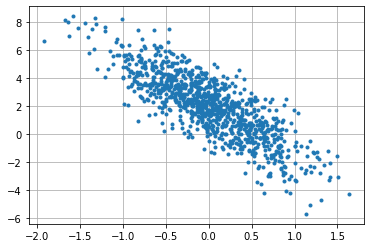

AFTER FACTORIZATION:


<ipython-input-4-bf112f0f6a51>:14: RuntimeWarning: covariance is not positive-semidefinite.
  data = np.random.multivariate_normal(mean, sdCh, size=1000)


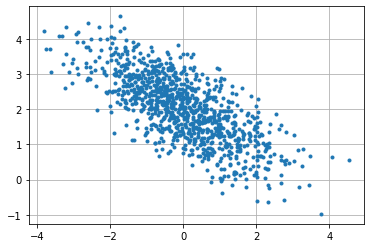

In [4]:
# 3

mean = [0, 2]
sd = np.array([[.3, -1], [-1, 5]])

print('BEFORE FACTORIZATION:')
data = np.random.multivariate_normal(mean, sd, size=1000)
plt.plot(data[:, 0], data[:, 1],'.')
plt.grid()
plt.show()

print('AFTER FACTORIZATION:')
sdCh = np.linalg.cholesky(sd)
data = np.random.multivariate_normal(mean, sdCh, size=1000)
plt.plot(data[:, 0], data[:, 1],'.')
plt.grid()
plt.show()

# Cholesky decomposition was used on the the covariance matrix from example 6.6
# That new matrix was used as a parameter for a multivariate normal distribution
# This new data was plotted using sample size = 1000 to visualize the distribution

OBSERVED MEAN: RED LINE, POISSON RANDOM MEAN


<function matplotlib.pyplot.show(*args, **kw)>

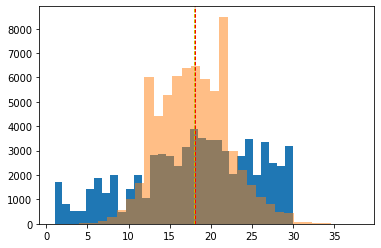

In [6]:
# 4

print('OBSERVED MEAN: RED LINE, POISSON RANDOM MEAN')

data = []
cleaned_X = list(range(1,31))
cleaned_Y = []

with open('nyc-east-river-bicycle-counts.csv', mode='r') as file:

  csvFile = csv.reader(file)

  for line in csvFile:
    data.append([line[1], line[6]])

data.remove(data[0])
data = data[:30]
for i in range(len(data)):
    cleaned_Y.append(data[i][1])

simplified = []

for i in range(len(cleaned_Y)):
  for j in range(int(float(cleaned_Y[i]))):
    simplified.append(i+1)

mean = sum(simplified)/len(simplified)

plt.hist(simplified, 30)
plt.axvline(mean, color='r', linestyle='dashed', linewidth=1)
plt.show

# def num_rand(p, q):
#   u = np.random.uniform(0,1)
#   if u < p : return 0
#   if u < (p+q) : return 1
#   return 2

# poissonfunction by Gareth Tribello (YouTube video given)
def poisson(lam):
  el, n, u = np.exp(-lam), 0, np.random.uniform(0,1)
  pp, fact, pow = el, 1, 1
  while u > pp:
    n = n + 1
    fact, pow = n*fact, lam*pow
    pp = pp + (pow/fact)*el
  return n

poisson_random = []
lam = 18

for i in range(len(simplified)):
  poisson_random.append(poisson(lam))

mean = sum(poisson_random)/len(poisson_random)
plt.hist(poisson_random, 30, alpha=0.5)
plt.axvline(mean, color='y', linestyle='dashed', linewidth=1)
plt.show

HISTOGRAM OF QUEUE AT ANY GIVEN TIME FROM TIME 0 TO 1000 UNITS


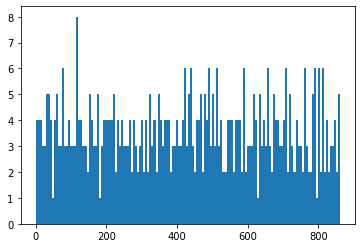

In [7]:
# 5

# poissonfunction by Gareth Tribello (YouTube video given)
def poisson(lam):
  el, n, u = np.exp(-lam), 0, np.random.uniform(0,1)
  pp, fact, pow = el, 1, 1
  while u > pp:
    n = n + 1
    fact, pow = n*fact, lam*pow
    pp = pp + (pow/fact)*el
  return n

lam = 1
queue = []

r = np.random.exponential(4, 1000)

for i in range(1000):
  queue.append([poisson(lam), r[i].round()])

ind = 0 
time = 0
inLine = [0]
newTime = 0
# simulate queue
while True:
  newTime = time + (queue[ind][0] * queue[ind][1])
  if newTime != time:
      inLine.append(queue[ind][0] + inLine[-1])
      time = newTime
  if (ind + 1) == 1000:
      break
  else:
      ind += 1
for i in range(len(inLine)):
  time_to_live = int(queue[i][1])
  if (time_to_live + i) < len(inLine):
    inLine[time_to_live + i] -= queue[i][0]


print('HISTOGRAM OF QUEUE AT ANY GIVEN TIME FROM TIME 0 TO 1000 UNITS')
plt.hist(inLine, 150)
plt.show()    
